In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import statsmodels
from typing import Tuple, List
import scipy
from scipy.stats import skew, kurtosis
import numpy as np
import os
import powerlaw
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import poisson
from scipy.stats import chisquare
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
from scipy.stats import norm

In [4]:
base_path = "/home/shiftpub/Results_Simulation/iteration_info"
lt_data = []
for i in range(1,6):
    data_path = os.path.join(base_path, f"sep_trader_lt{i}.csv")
    lt_data.append(pd.read_csv(data_path))
mm_data = []
for i in range(1,3):
    data_path = os.path.join(base_path, f"sep_trader_mm{i}.csv")
    mm_data.append(pd.read_csv(data_path))

In [9]:
corr = np.corrcoef(mm_data[0]["curr_mp"], mm_data[0]["curr_mp_2"])[0, 1]
print("corr coef:", corr)

corr coef: 0.040194334494166234


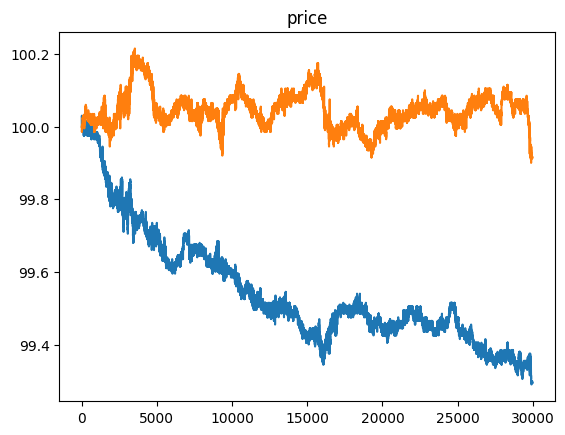

In [13]:
#plot mid prices:
plt.plot(mm_data[0]["curr_mp"])
plt.plot(mm_data[0]["curr_mp_2"])
plt.title("price")
plt.show()

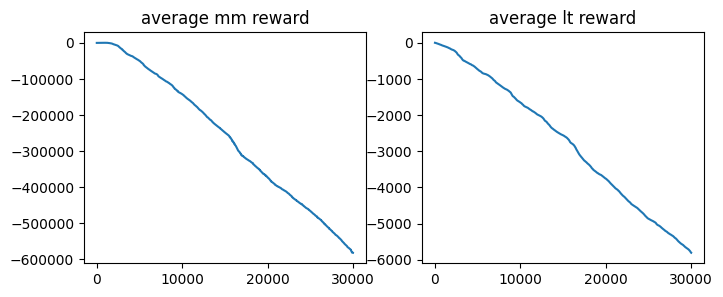

In [27]:
#Reward
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
#plot mm reward:
rew = np.mean([mm_data[0]["reward"].cumsum(), mm_data[1]["reward"]],0)
plt.plot(rew)
plt.title("average mm reward")

plt.subplot(1,2,2)
#plot lt reward:
rew = np.mean([lt_data[i]["rew"].cumsum() for i in range(5)],0)
plt.plot(rew)
plt.title("average lt reward")
plt.show()


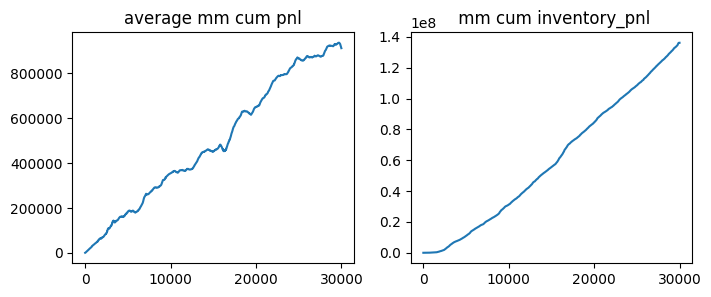

In [29]:
#Pnl
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
#plot mm reward:
rew = np.mean([mm_data[i]["recent_pl_change"].cumsum() for i in range(2)],0)
plt.plot(rew)
plt.title("average mm cum pnl")

plt.subplot(1,2,2)
#plot lt reward:
rew = np.mean([mm_data[i]["change_inven_pnl"].cumsum() for i in range(2)],0)
plt.plot(rew)
plt.title(" mm cum inventory_pnl")
plt.show()


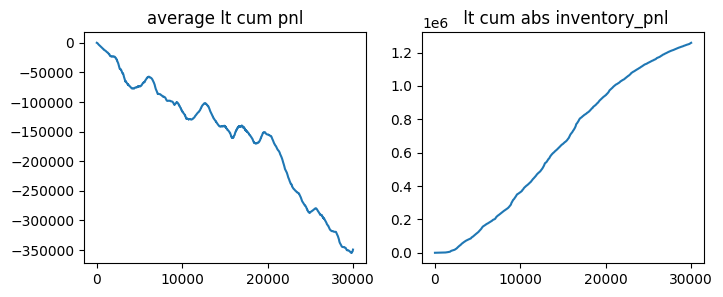

In [30]:
#Pnl
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
#plot mm reward:
rew = np.mean([lt_data[i]["pnl"].cumsum() for i in range(2)],0)
plt.plot(rew)
plt.title("average lt cum pnl")

plt.subplot(1,2,2)
#plot lt reward:
rew = np.mean([(lt_data[i]["inv_pnl"]+lt_data[i]["inv_pnl_2"]).cumsum() for i in range(2)],0)
plt.plot(rew)
plt.title(" lt cum abs inventory_pnl")
plt.show()